# Fault Classification using ANN
#### Samruddhi Taywade 
##### Final Year B.E. 
P.R.Patil College of Engineering and Technology

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Data

In [99]:
data = pd.read_csv('fault_classification.csv',index_col='Day')

### Neuron Which takes decision about fault in tank filling

In [123]:
class Neuron:
    def __init__(self,eta=0.01):
        self.eta=eta
        
    def init_weights(self,X):
        return np.random.random(1+X.shape[1])
    
    def train(self,X,outputs,e_max):
        self.w_ =np.random.random(1+X.shape[1])
        self.error_ = []
        epoch=1
        steps = 0
        done = False
        while not done:
            #print("Epoch : ",epoch)
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x)
                err += 0.5*(d-out)**2
                #print("For input pattern : ",x)
                self.w_[1:] = self.w_[1:] + self.eta*(d-out)*self.gradient(x)*x
                self.w_[0] = self.w_[0] + self.eta*(d-out)*self.gradient(x)*1
                #print("Weights : ",self.w_)
                steps+=1
            if err<e_max:
                done = True
                print("Training done")
            else:
                #print("$")
                epoch+=1
                self.error_.append(err)
            #print("Error : ",err)
        #print("No of epochs required for training are : ",epoch)
        print('No of steps required for training are : ',steps)
        print('Final Error : ',self.error_[-1])
        return self
    
    def get_weights(self):
        return self.w_

    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]

    def activation(self,X):
        net = self.net_input(X)
        return (1-np.exp(-net))/(1+np.exp(-net))
    
    def gradient(self,X):
        return 0.5*(1-self.predict(X)**2)

    def predict(self,X):
        return self.activation(X)

In [124]:
X = []
d = []
for i,j,k in zip(list(data['rate']),list(data['time_to_fill']),list(data['class'])):
    X.append((i,j))
    d.append(k)
    
X = np.array(X)
d = np.array(d)

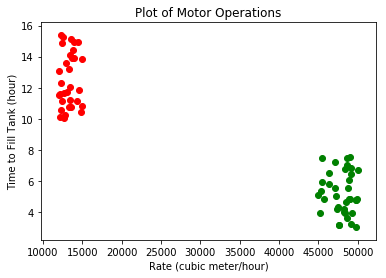

In [169]:
for i in range(len(X)):    
    if int(d[i]) == -1:
        plt.scatter(X[i][0],X[i][1],c='g')
    else:
        plt.scatter(X[i][0],X[i][1],c='r' )
        
plt.title('Plot of Motor Operations')
plt.xlabel('Rate (cubic meter/hour)')
plt.ylabel('Time to Fill Tank (hour)')
plt.show()

In [143]:
neuron = Neuron()

In [146]:
X_std = np.copy(X)

X_std[ : , 0] = (X[: , 0] - X[: , 0].mean()) / X[: , 0].std()

X_std[ : , 1] = (X[: , 1] - X[: , 1].mean()) / X[: , 1].std()

In [150]:
neuron.init_weights(X_std)

array([0.43572231, 0.62452666, 0.10674851])

In [152]:
neuron.train(X_std,d,0.01)

Training done
No of steps required for training are :  153732
Final Error :  0.010003564737185233


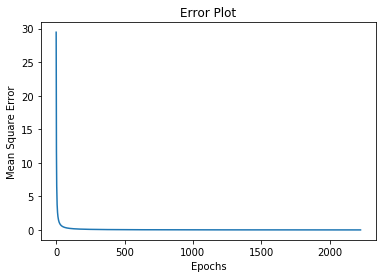

In [154]:
plt.plot(neuron.error_)
plt.title('Error Plot')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.show()

### Decision Boundary created by our Neuron

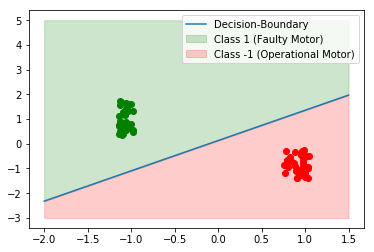

In [165]:
x = np.arange(-2,2,0.5)
a,b,c = neuron.w_[1],neuron.w_[2],neuron.w_[0]
y = (-c-a*x)/b 
colors = ['blue','green','red']
plt.plot(x,y,label='Decision-Boundary')
for i,j in zip(X_std,d):
    plt.scatter(i[0],i[1],c='green' if j==1 else 'red')
plt.fill_between(x,y,5,color='green',alpha=0.2,label='Class 1 (Faulty Motor)')
plt.fill_between(x,y,-3,color='red',alpha=0.2,label='Class -1 (Operational Motor)')
plt.legend()
plt.show()